In [ ]:
# !pip install -U spacy

In [ ]:
conda install -c conda-forge spacy

In [ ]:
!pip install spacy
!python -m spacy download en

In [ ]:
!pip install -U pip setuptools wheel

In [148]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import spacy
from spacy import displacy

# graphics import
import matplotlib.pyplot as plt
import seaborn as sns

 #Natural language tool kits
import nltk
from nltk import FreqDist, ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# download stopwords
nltk.download('stopwords')
import unidecode

from wordcloud import WordCloud,STOPWORDS

# string operations
import string 
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.contrib.classifier import DecisionViz
from yellowbrick.classifier import DiscriminationThreshold

from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential, load_model
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from lime.lime_text import LimeTextExplainer

# Changing the number of characters displayed in pandas 
pd.options.display.max_colwidth = 200
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
df = pd.read_csv('alldata_1_for_kaggle.csv', encoding="latin-1")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'0':'label', 'a':'text'}, inplace=True)
df

,label,text
0,Thyroid_Cancer,Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the aDepartment of Surgery Coll...
1,Thyroid_Cancer,""" The adopted strategy was the same as that used in prior years [] and is based on four exclusive queries that return four disjoint citation subsets The first query QPub_plain is based on a pl..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationIntroduction Intraoperative thrombosis of saphenous veins SV during harvesting is very rareCase Report We present a case of ...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an uncommon clinical entity that is characterized by alocalized proliferation of neoplastic monoclonal plasma cells This case report describes a50yearold ...
4,Thyroid_Cancer,This study aimed to investigate serum matrix metalloproteinase MMP2 and MMP9levels in patients with papillary thyroid carcinoma PTCMethods Fortyone patients with PTC undergoing ultrasoundguided r...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who presented with chief complaintsof shortness of breath and haemoptysis chest radiography revealed completecollapse of the left lung bronchoscopy revealed a...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs reported previously the incidence of quadruple advanced scrcs is very rarewe present the case who underwent laparoscopic twosegment resection of the colo...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally accepted and astem celllike subpopulation that is called cancer stem cellscscs has been identiï¬ed in various types of malignanttumors although th...
7568,Colon_Cancer,"""adipogenesis is the process through which mesenchymalstem cells mscs commit to the adipose lineage and diï¬erentiate into adipocytes during this process preadipocytescease to proliferate begin to..."


In [4]:
# print first document
print(df['text'][0])

Thyroid surgery in  children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the  aDepartment of Surgery College of Medicine Qassim University Buraidah Al Qassim Saudi Arabia  bDepartment of Surgery King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia cDepartment of Medicine King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia Correspondence   Dr  Osama Ibrahim  Almosallam  Department of  Surgery  College  of  Medicine Qassim  University  PO  Box   Buraidah  Al  Qassim   Saudi  Arabia  osama_iaahotmailcom ORCID orcid0000000290367564        Citation  Almosallam OI Aseeri A Alhumaid A AlZahrani AS Alsobhi S AlShanafey S Thyroid surgery in  children  in  a  single  institution  from   Ann  Saudi  Med         Received January  Accepted May  Published August  Copyright Copyright   Annals of Saudi Medicine Saudi Arabia This is an   access  under the Creative Commons At

# 2. Exploratory Data Analysis (EDA)

In [6]:
df['label'].unique()

array(['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'], dtype=object)

## Kernel distribution of number of words w.r.t Distinct Labels

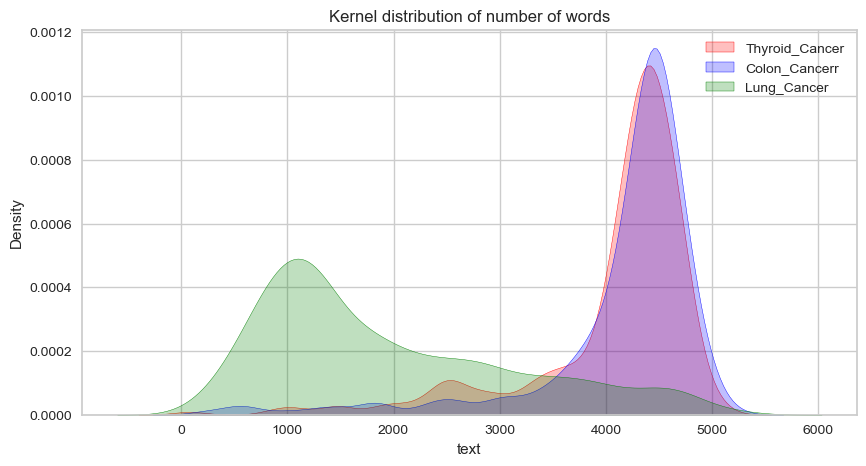

In [213]:
num_1 = df[df['label']== 'Thyroid_Cancer']['text'].apply(lambda x: len(x.split()))
num_2 = df[df['label']== 'Colon_Cancer']['text'].apply(lambda x: len(x.split()))
num_3 = df[df['label']== 'Lung_Cancer']['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.kdeplot(num_1, shade=True, color = 'red').set_title('Kernel distribution of number of words')
sns.kdeplot(num_2, shade=True, color = 'blue')
sns.kdeplot(num_3, shade=True, color = 'green')

plt.legend(labels=['Thyroid_Cancer', 'Colon_Cancerr', 'Lung_Cancer'])

## Size of the text: number of characters w.r.t Distinct Outcomes

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

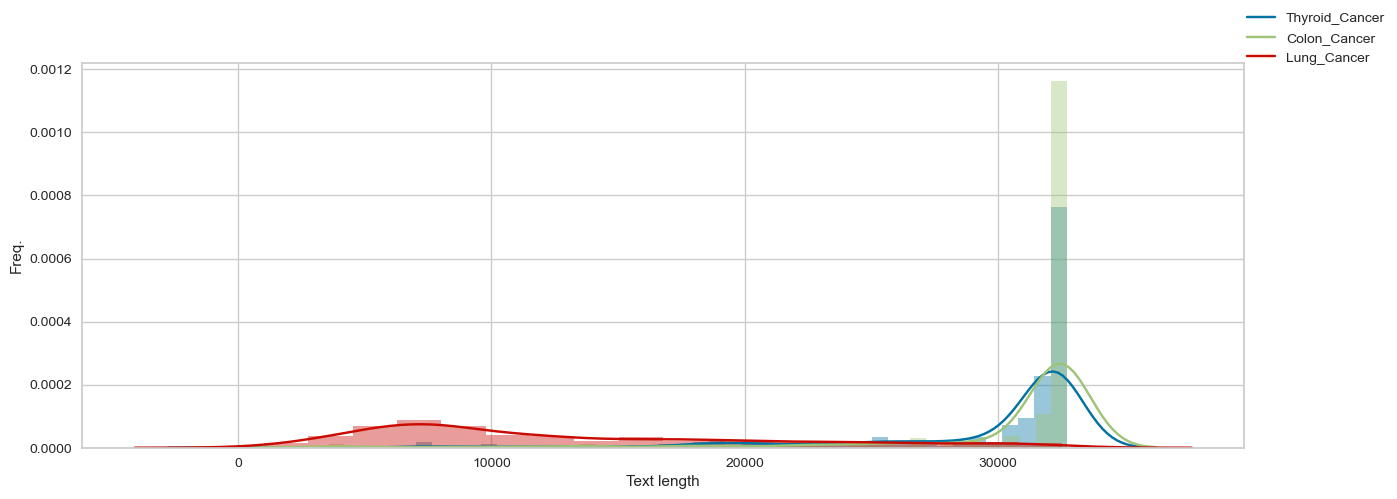

In [7]:
fig = plt.figure(figsize=(15,5))
ax = sns.distplot(df[df['label'] == 'Thyroid_Cancer']['text_len'])
ax = sns.distplot(df[df['label'] == 'Colon_Cancer']['text_len'])
ax = sns.distplot(df[df['label'] == 'Lung_Cancer']['text_len'])
ax.set(xlabel='Text length', ylabel='Freq.')
fig.legend(labels=['Thyroid_Cancer','Colon_Cancer', 'Lung_Cancer'])
plt.show()

In [9]:
df[df['label'] == 'Thyroid_Cancer']['text_len'].describe()

count     2810.000000
mean     29485.494662
std       5470.730193
min        600.000000
25%      29706.000000
50%      32057.000000
75%      32342.000000
max      32712.000000
Name: text_len, dtype: float64

In [10]:
df[df['label'] == 'Colon_Cancer']['text_len'].describe()

count     2580.000000
mean     30241.172093
std       5643.808030
min       1717.000000
25%      31996.000000
50%      32463.500000
75%      32560.000000
max      32712.000000
Name: text_len, dtype: float64

In [11]:
df[df['label'] == 'Lung_Cancer']['text_len'].describe()

count     2180.000000
mean     12924.134862
std       7918.571164
min       1034.000000
25%       6788.500000
50%      10474.000000
75%      18305.250000
max      32524.000000
Name: text_len, dtype: float64

## Size of the text: number of words w.r.t Distinct Outcomes

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

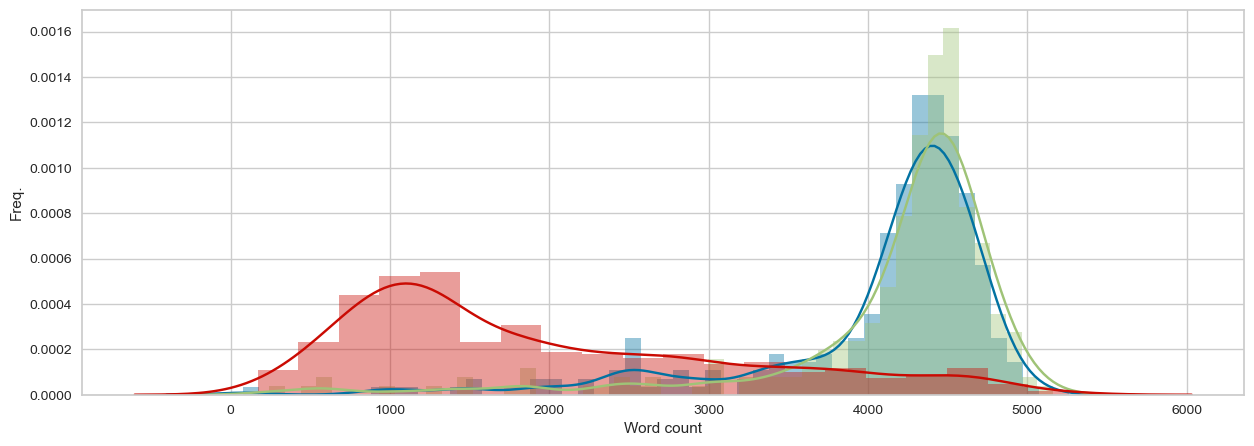

In [70]:
df['word_count'] = df['text'].str.split().map(lambda x:len(x))

plt.figure(figsize=(15,5))
ax = sns.distplot(df[df['label'] == 'Thyroid_Cancer']['word_count'])
ax = sns.distplot(df[df['label'] == 'Colon_Cancer']['word_count'])
ax = sns.distplot(df[df['label'] == 'Lung_Cancer']['word_count'])
ax.set(xlabel='Word count', ylabel='Freq.')
fig.legend(labels=['Thyroid_Cancer','Colon_Cancer', 'Lung_Cancer'])
plt.show()

## 10 most frequent words

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


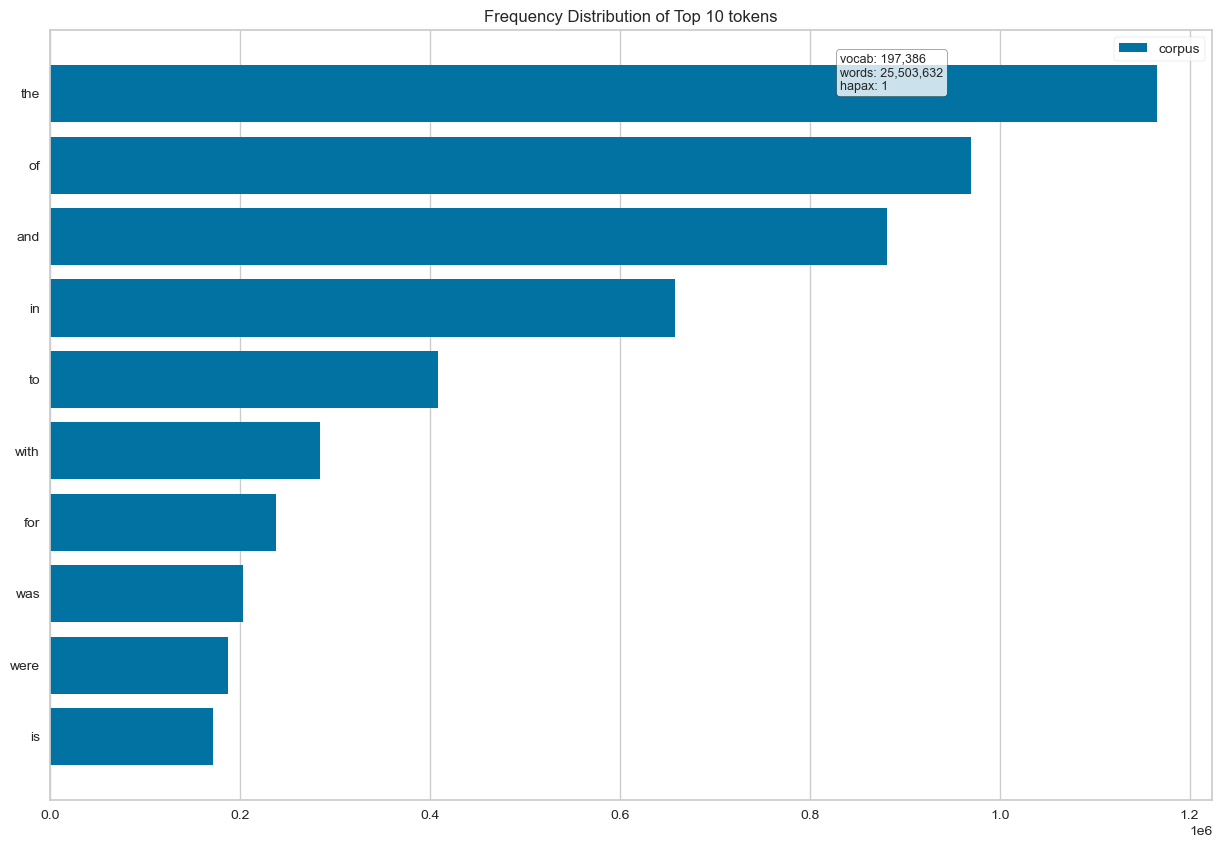

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [14]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df['text'].tolist())
features   = vectorizer.get_feature_names()

fig = plt.figure(figsize=(15,10))
visualizer = FreqDistVisualizer(features=features, orient='h', n=10)
visualizer.fit(docs)
visualizer.show()

## 10 most frequent bigrams

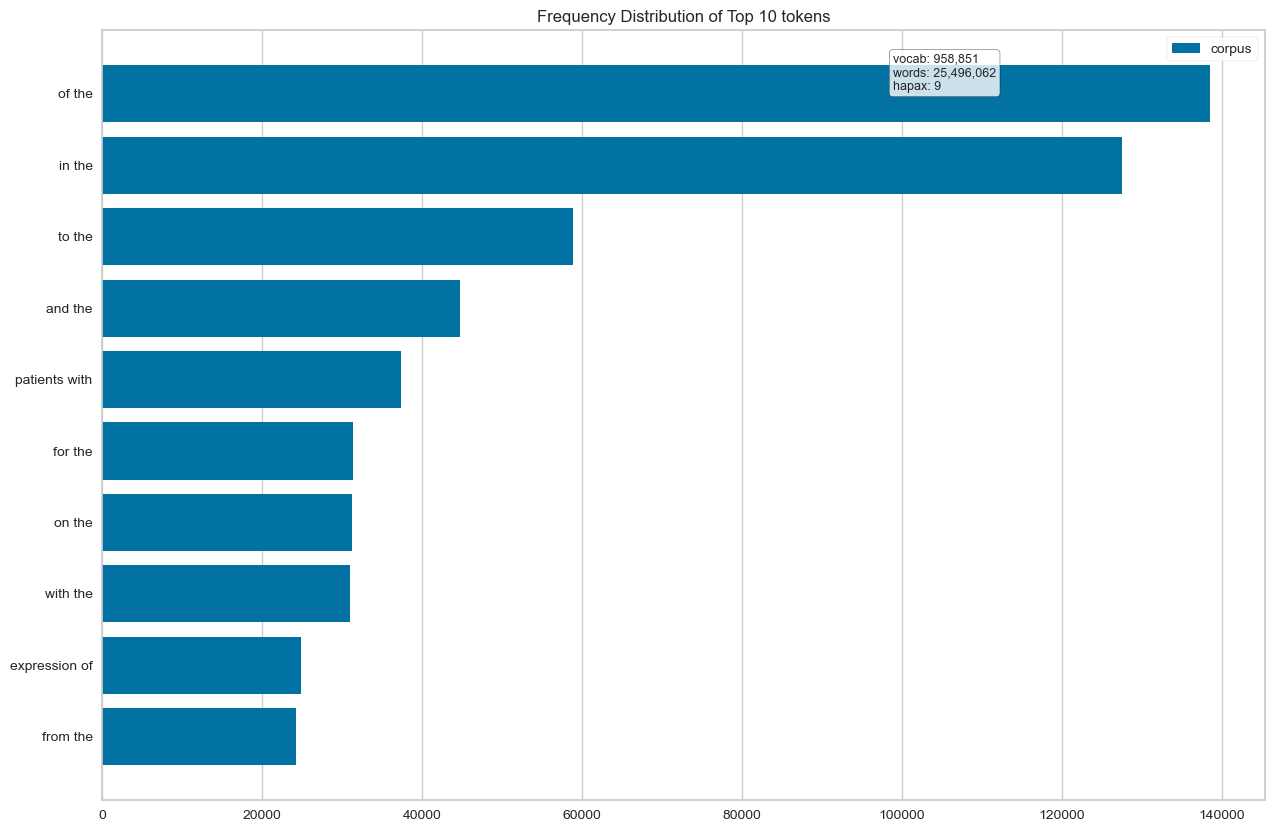

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [15]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
docs       = vectorizer.fit_transform(df['text'].tolist())
features   = vectorizer.get_feature_names()

fig = plt.figure(figsize=(15,10))
visualizer = FreqDistVisualizer(features=features, orient='h', n=10)
visualizer.fit(docs)
visualizer.show()

## Class Label distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


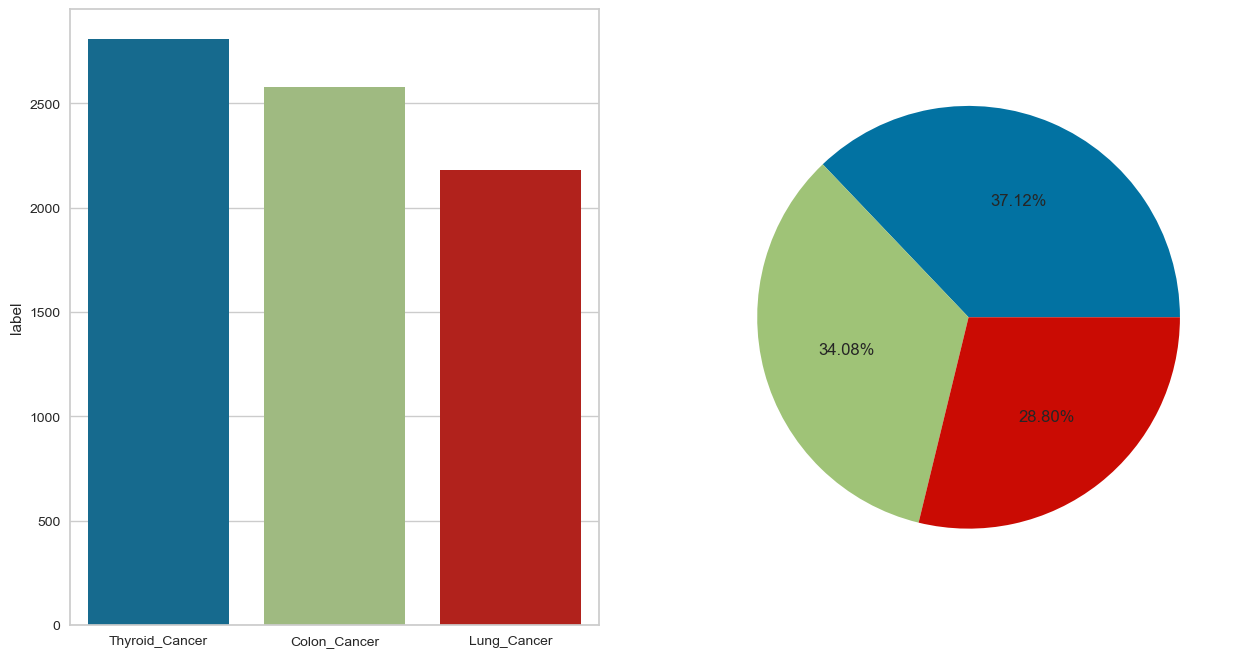

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(df['label'].value_counts().index,df['label'].value_counts(), ax=axes[0])

axes[1].pie(df['label'].value_counts(),
            autopct='%1.2f%%')

plt.show()

# 3. Data Pre-processing

## Transforming Text to Lowercase

In [71]:
df['text_lw'] = df['text'].str.lower()
df[['text','text_lw']].head(10)

,text,text_lw
0,Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the aDepartment of Surgery Coll...,thyroid surgery in children in a single institution from osama ibrahim almosallama ali aseerib ahmed alhumaida ali s alzahranic saif alsobhib saud alshanafeybfrom the adepartment of surgery coll...
1,""" The adopted strategy was the same as that used in prior years [] and is based on four exclusive queries that return four disjoint citation subsets The first query QPub_plain is based on a pl...",""" the adopted strategy was the same as that used in prior years [] and is based on four exclusive queries that return four disjoint citation subsets the first query qpub_plain is based on a pl..."
2,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationIntroduction Intraoperative thrombosis of saphenous veins SV during harvesting is very rareCase Report We present a case of ...,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationintroduction intraoperative thrombosis of saphenous veins sv during harvesting is very rarecase report we present a case of ...
3,Solitary plasmacytoma SP of the skull is an uncommon clinical entity that is characterized by alocalized proliferation of neoplastic monoclonal plasma cells This case report describes a50yearold ...,solitary plasmacytoma sp of the skull is an uncommon clinical entity that is characterized by alocalized proliferation of neoplastic monoclonal plasma cells this case report describes a50yearold ...
4,This study aimed to investigate serum matrix metalloproteinase MMP2 and MMP9levels in patients with papillary thyroid carcinoma PTCMethods Fortyone patients with PTC undergoing ultrasoundguided r...,this study aimed to investigate serum matrix metalloproteinase mmp2 and mmp9levels in patients with papillary thyroid carcinoma ptcmethods fortyone patients with ptc undergoing ultrasoundguided r...
5,This study was performed to explore the effective management of bleeding associated with radiofrequency ablation RFA of benign thyroid nodulesMethods Thirtyfive patients with benign thyroid nodul...,this study was performed to explore the effective management of bleeding associated with radiofrequency ablation rfa of benign thyroid nodulesmethods thirtyfive patients with benign thyroid nodul...
6,This study was performed assess the clinical outcomes of elderly patients withosteoporotic femoral neck fractures FNFs AOOTA 31BC treated by initial uncementedtotal hip arthroplasty UTA or cement...,this study was performed assess the clinical outcomes of elderly patients withosteoporotic femoral neck fractures fnfs aoota 31bc treated by initial uncementedtotal hip arthroplasty uta or cement...
7,Journal of International Medical Research  The Authors reuse guidelinessagepubcomjournalspermissions journalssagepubcomhomeimrCase ReportNivolumab plus gemcitabinedexamethasone and cisplatinchem...,journal of international medical research  the authors reuse guidelinessagepubcomjournalspermissions journalssagepubcomhomeimrcase reportnivolumab plus gemcitabinedexamethasone and cisplatinchem...
8,Gastric cancer GC persists as a worldwide public health crisis According to the American Cancer Society the 5yearsurvival rate of GC remains at worldwide and withinthe United States1 These surv...,gastric cancer gc persists as a worldwide public health crisis according to the american cancer society the 5yearsurvival rate of gc remains at worldwide and withinthe united states1 these surv...
9,Scars Burns HealingVolume  reuse guidelinessagepubcomjournalspermissions The Authors journalssagepubcomhomesbhKeloids are pathological scars that grow over time and extend beyond the initia...,scars burns healingvolume  reuse guidelinessagepubcomjournalspermissions the authors journalssagepubcomhomesbhkeloids are pathological scars that grow over time and extend beyond the initia...


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## DataCleaning: Removing unncessary text (html, links, pontuation, numbers, stopwords)

In [26]:
sw = stopwords.words('english')

def clean_text(text):
    # remove 
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove tags
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove breaklines
    text = re.sub('\n', '', text)
    # remove numbers
    text = re.sub('\w*\d\w*', '', text)
    
    # remove accent
    text = unidecode.unidecode(text)
    
    # transform text into token
    text_token = nltk.word_tokenize(text)
    
    # remove stopwords
    words = [w for w in text_token if w not in sw]
    
    return ' '.join(words)

df['text_cl'] = df['text_lw'].apply(clean_text)
df[['text','text_lw','text_cl']].head(10)

,text,text_lw,text_cl
0,Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the aDepartment of Surgery Coll...,thyroid surgery in children in a single institution from osama ibrahim almosallama ali aseerib ahmed alhumaida ali s alzahranic saif alsobhib saud alshanafeybfrom the adepartment of surgery coll...,thyroid surgery children single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim univ...
1,""" The adopted strategy was the same as that used in prior years [] and is based on four exclusive queries that return four disjoint citation subsets The first query QPub_plain is based on a pl...",""" the adopted strategy was the same as that used in prior years [] and is based on four exclusive queries that return four disjoint citation subsets the first query qpub_plain is based on a pl...",adopted strategy used prior years based four exclusive queries return four disjoint citation subsets first query qpubplain based plaintext search pubmed titles using keywords second query qpubinde...
2,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationIntroduction Intraoperative thrombosis of saphenous veins SV during harvesting is very rareCase Report We present a case of ...,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationintroduction intraoperative thrombosis of saphenous veins sv during harvesting is very rarecase report we present a case of ...,coronary arterybypass grafting thrombosis ! brin ! brinogen mutationintroduction intraoperative thrombosis saphenous veins sv harvesting rarecase report present case male patient multivesselcorona...
3,Solitary plasmacytoma SP of the skull is an uncommon clinical entity that is characterized by alocalized proliferation of neoplastic monoclonal plasma cells This case report describes a50yearold ...,solitary plasmacytoma sp of the skull is an uncommon clinical entity that is characterized by alocalized proliferation of neoplastic monoclonal plasma cells this case report describes a50yearold ...,solitary plasmacytoma sp skull uncommon clinical entity characterized alocalized proliferation neoplastic monoclonal plasma cells case report describes male presented headache exophytic soft mass ...
4,This study aimed to investigate serum matrix metalloproteinase MMP2 and MMP9levels in patients with papillary thyroid carcinoma PTCMethods Fortyone patients with PTC undergoing ultrasoundguided r...,this study aimed to investigate serum matrix metalloproteinase mmp2 and mmp9levels in patients with papillary thyroid carcinoma ptcmethods fortyone patients with ptc undergoing ultrasoundguided r...,study aimed investigate serum matrix metalloproteinase patients papillary thyroid carcinoma ptcmethods fortyone patients ptc undergoing ultrasoundguided radiofrequency ablationrfa controls include...
5,This study was performed to explore the effective management of bleeding associated with radiofrequency ablation RFA of benign thyroid nodulesMethods Thirtyfive patients with benign thyroid nodul...,this study was performed to explore the effective management of bleeding associated with radiofrequency ablation rfa of benign thyroid nodulesmethods thirtyfive patients with benign thyroid nodul...,study performed explore effective management bleeding associated radiofrequency ablation rfa benign thyroid nodulesmethods thirtyfive patients benign thyroid nodules treated ultrasoundguided rfa j...
6,This study was performed assess the clinical outcomes of elderly patients withosteoporotic femoral neck fractures FNFs AOOTA 31BC treated by initial uncementedtotal hip arthroplasty UTA or cement...,this study was performed assess the clinical outcomes of elderly patients withosteoporotic femoral neck fractures fnfs aoota 31bc treated by initial uncementedtotal hip arthroplasty

## Text Lemmatization

In [27]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...


True

In [28]:
lemmatizer = WordNetLemmatizer() 

def lemmatize_sentence(text):
    # transform text into token
    text_token = nltk.word_tokenize(text)
    lemmatized_sentence = []
    for word in text_token:
        lemmatized_sentence.append(word)
    return " ".join(lemmatized_sentence)    
    

In [29]:
df['text_lm'] = df['text_cl'].apply(lemmatize_sentence)
df[['text','text_lw','text_cl', 'text_lm']].head(20)

,text,text_lw,text_cl,text_lm
0,Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the aDepartment of Surgery Coll...,thyroid surgery in children in a single institution from osama ibrahim almosallama ali aseerib ahmed alhumaida ali s alzahranic saif alsobhib saud alshanafeybfrom the adepartment of surgery coll...,thyroid surgery children single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim univ...,thyroid surgery children single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim univ...
1,""" The adopted strategy was the same as that used in prior years [] and is based on four exclusive queries that return four disjoint citation subsets The first query QPub_plain is based on a pl...",""" the adopted strategy was the same as that used in prior years [] and is based on four exclusive queries that return four disjoint citation subsets the first query qpub_plain is based on a pl...",adopted strategy used prior years based four exclusive queries return four disjoint citation subsets first query qpubplain based plaintext search pubmed titles using keywords second query qpubinde...,adopted strategy used prior years based four exclusive queries return four disjoint citation subsets first query qpubplain based plaintext search pubmed titles using keywords second query qpubinde...
2,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationIntroduction Intraoperative thrombosis of saphenous veins SV during harvesting is very rareCase Report We present a case of ...,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationintroduction intraoperative thrombosis of saphenous veins sv during harvesting is very rarecase report we present a case of ...,coronary arterybypass grafting thrombosis ! brin ! brinogen mutationintroduction intraoperative thrombosis saphenous veins sv harvesting rarecase report present case male patient multivesselcorona...,coronary arterybypass grafting thrombosis ! brin ! brinogen mutationintroduction intraoperative thrombosis saphenous veins sv harvesting rarecase report present case male patient multivesselcorona...
3,Solitary plasmacytoma SP of the skull is an uncommon clinical entity that is characterized by alocalized proliferation of neoplastic monoclonal plasma cells This case report describes a50yearold ...,solitary plasmacytoma sp of the skull is an uncommon clinical entity that is characterized by alocalized proliferation of neoplastic monoclonal plasma cells this case report describes a50yearold ...,solitary plasmacytoma sp skull uncommon clinical entity characterized alocalized proliferation neoplastic monoclonal plasma cells case report describes male presented headache exophytic soft mass ...,solitary plasmacytoma sp skull uncommon clinical entity characterized alocalized proliferation neoplastic monoclonal plasma cells case report describes male presented headache exophytic soft mass ...
4,This study aimed to investigate serum matrix metalloproteinase MMP2 and MMP9levels in patients with papillary thyroid carcinoma PTCMethods Fortyone patients with PTC undergoing ultrasoundguided r...,this study aimed to investigate serum matrix metalloproteinase mmp2 and mmp9levels in patients with papillary thyroid carcinoma ptcmethods fortyone patients with ptc undergoing ultrasoundguided r...,study aimed investigate serum matrix metalloproteinase patients papillary thyroid carcinoma ptcmethods fortyone patients ptc undergoing ultrasoundguided radiofrequency ablationrfa controls include...,study aimed investigate serum matrix metalloproteinase patients papillary thyroid carcinoma ptcmethods fortyone patients ptc undergoing ultrasoundguided radiofrequency ablati

## Removing words that have high frequency (above 80%) or low frequency (below 20%)

In [30]:
vectorizer = CountVectorizer(min_df=0.2, max_df=0.8)
docs       = vectorizer.fit_transform(df['text_lm'].tolist())
features   = vectorizer.get_feature_names()

stop_words_ = vectorizer.stop_words_
print(f'Removing {len(stop_words_)} words')

def remove_stopwords(text):
    # transform text into token
    text_token = nltk.word_tokenize(text)
    clean_text = []
    for word in not stop_words_:
        text_token.append(word)
    return " ".join(text_token)    

df['text_sw'] = df['text_lm'].apply(lemmatize_sentence)
df[['text','text_lw','text_cl', 'text_lm', 'text_sw']].head(20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Removing 158526 words


,text,text_lw,text_cl,text_lm,text_sw
0,Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the aDepartment of Surgery Coll...,thyroid surgery in children in a single institution from osama ibrahim almosallama ali aseerib ahmed alhumaida ali s alzahranic saif alsobhib saud alshanafeybfrom the adepartment of surgery coll...,thyroid surgery children single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim univ...,thyroid surgery children single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim univ...,thyroid surgery children single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim univ...
1,""" The adopted strategy was the same as that used in prior years [] and is based on four exclusive queries that return four disjoint citation subsets The first query QPub_plain is based on a pl...",""" the adopted strategy was the same as that used in prior years [] and is based on four exclusive queries that return four disjoint citation subsets the first query qpub_plain is based on a pl...",adopted strategy used prior years based four exclusive queries return four disjoint citation subsets first query qpubplain based plaintext search pubmed titles using keywords second query qpubinde...,adopted strategy used prior years based four exclusive queries return four disjoint citation subsets first query qpubplain based plaintext search pubmed titles using keywords second query qpubinde...,adopted strategy used prior years based four exclusive queries return four disjoint citation subsets first query qpubplain based plaintext search pubmed titles using keywords second query qpubinde...
2,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationIntroduction Intraoperative thrombosis of saphenous veins SV during harvesting is very rareCase Report We present a case of ...,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationintroduction intraoperative thrombosis of saphenous veins sv during harvesting is very rarecase report we present a case of ...,coronary arterybypass grafting thrombosis ! brin ! brinogen mutationintroduction intraoperative thrombosis saphenous veins sv harvesting rarecase report present case male patient multivesselcorona...,coronary arterybypass grafting thrombosis ! brin ! brinogen mutationintroduction intraoperative thrombosis saphenous veins sv harvesting rarecase report present case male patient multivesselcorona...,coronary arterybypass grafting thrombosis ! brin ! brinogen mutationintroduction intraoperative thrombosis saphenous veins sv harvesting rarecase report present case male patient multivesselcorona...
3,Solitary plasmacytoma SP of the skull is an uncommon clinical entity that is characterized by alocalized proliferation of neoplastic monoclonal plasma cells This case report describes a50yearold ...,solitary plasmacytoma sp of the skull is an uncommon clinical entity that is characterized by alocalized proliferation of neoplastic monoclonal plasma cells this case report describes a50yearold ...,solitary plasmacytoma sp skull uncommon clinical entity characterized alocalized proliferation neoplastic monoclonal plasma cells case report describes male presented headache exophytic soft mass ...,solitary plasmacytoma sp skull uncommon clinical entity characterized alocalized proliferation neoplastic monoclonal plasma cells case report describes male presented headache exophytic soft mass ...,solitary plasmacytoma sp skull uncommon clinical entity characterized alocalized proliferation neoplastic monoclonal plasma cells case report describes male presented

### Text Length per Label

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

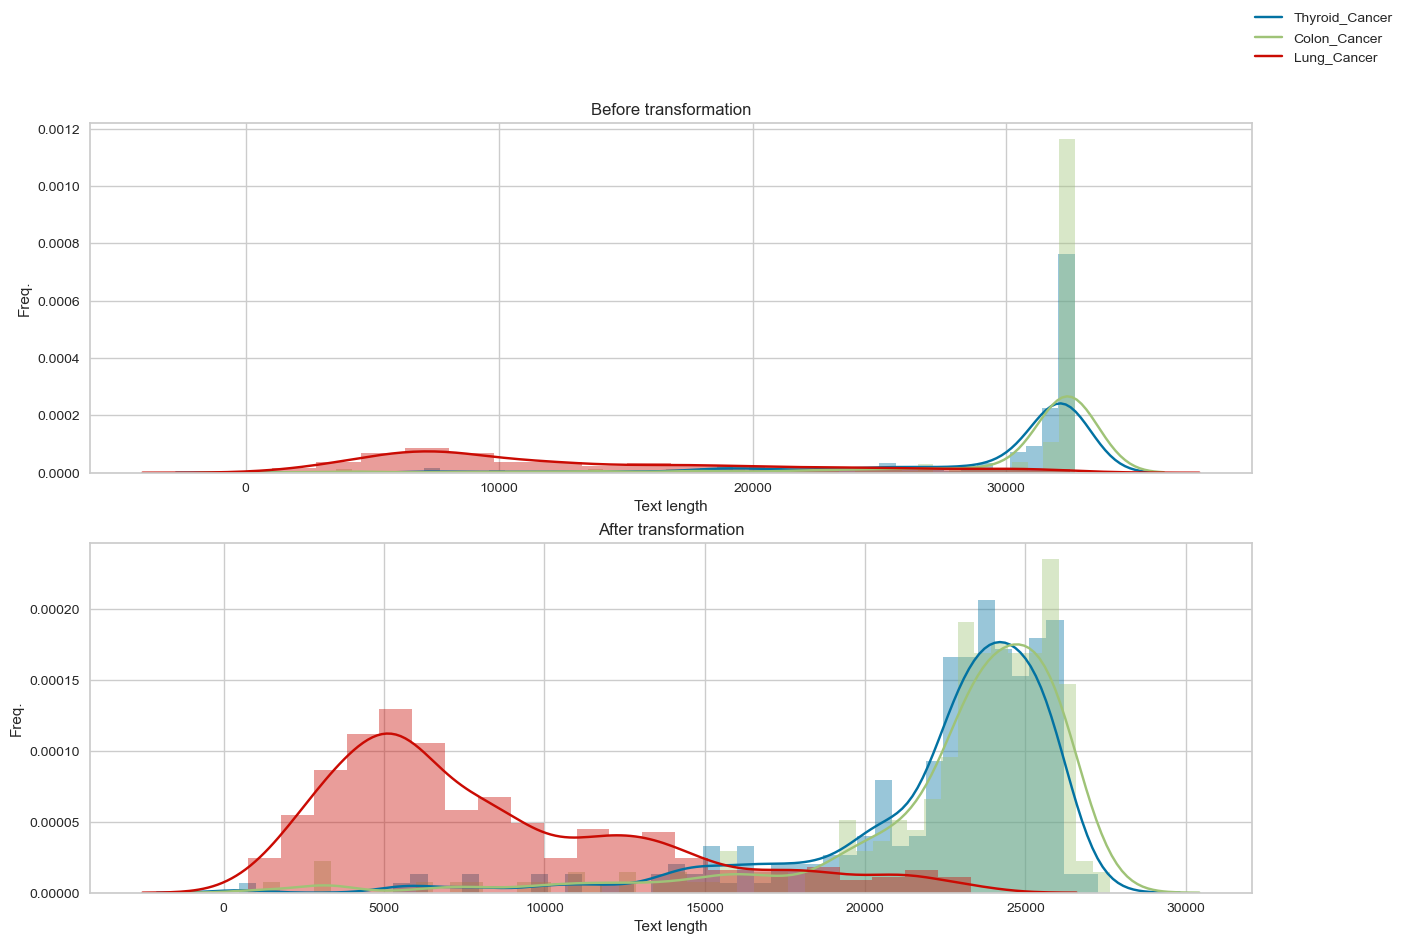

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

df['text_len'] = df['text'].str.len()
axes[0].set_title('Before transformation')
ax = sns.distplot(df[df['label'] == 'Thyroid_Cancer']['text_len'], ax=axes[0])
ax = sns.distplot(df[df['label'] == 'Colon_Cancer']['text_len'], ax=axes[0])
ax = sns.distplot(df[df['label'] == 'Lung_Cancer']['text_len'], ax=axes[0])
ax.set(xlabel='Text length', ylabel='Freq.')

df['text_len'] = df['text_sw'].str.len()
axes[1].set_title('After transformation')
ax = sns.distplot(df[df['label'] == 'Thyroid_Cancer']['text_len'], ax=axes[1])
ax = sns.distplot(df[df['label'] == 'Colon_Cancer']['text_len'], ax=axes[1])
ax = sns.distplot(df[df['label'] == 'Lung_Cancer']['text_len'], ax=axes[1])
ax.set(xlabel='Text length', ylabel='Freq.')


fig.legend(labels=['Thyroid_Cancer','Colon_Cancer', 'Lung_Cancer'])
plt.show()

### Word Count w.r.t outcome

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

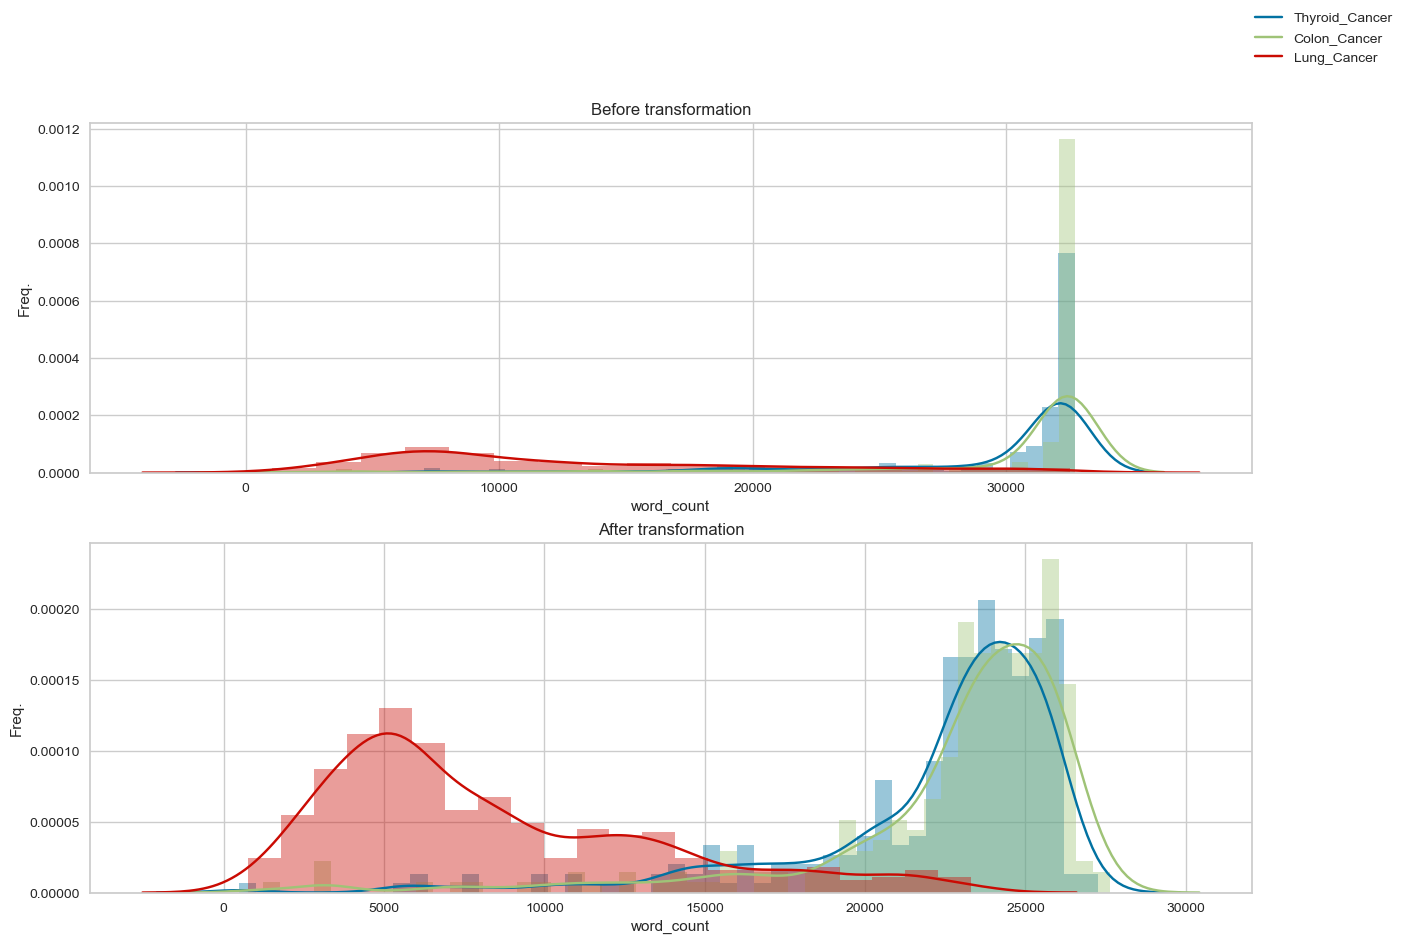

In [164]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

df['word_count'] = df['text'].str.len()
axes[0].set_title('Before transformation')
ax = sns.distplot(df[df['label'] == 'Thyroid_Cancer']['word_count'], ax=axes[0])
ax = sns.distplot(df[df['label'] == 'Colon_Cancer']['word_count'], ax=axes[0])
ax = sns.distplot(df[df['label'] == 'Lung_Cancer']['word_count'], ax=axes[0])
ax.set(xlabel='word_count', ylabel='Freq.')

df['word_count'] = df['text_sw'].str.len()
axes[1].set_title('After transformation')
ax = sns.distplot(df[df['label'] == 'Thyroid_Cancer']['word_count'], ax=axes[1])
ax = sns.distplot(df[df['label'] == 'Colon_Cancer']['word_count'], ax=axes[1])
ax = sns.distplot(df[df['label'] == 'Lung_Cancer']['word_count'], ax=axes[1])
ax.set(xlabel='word_count', ylabel='Freq.')


fig.legend(labels=['Thyroid_Cancer','Colon_Cancer', 'Lung_Cancer'])
plt.show()

### 10 most frequent words

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


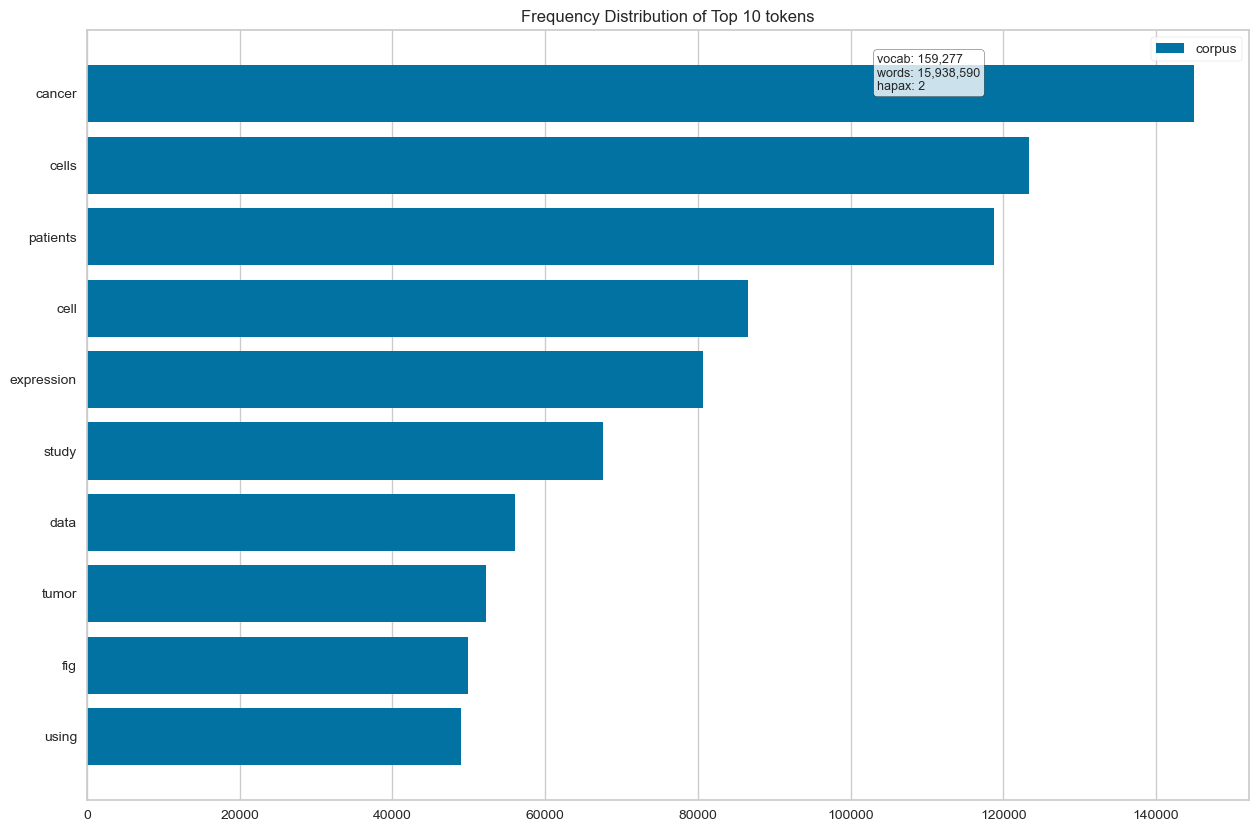

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [35]:
fig = plt.figure(figsize=(15,10))
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df['text_sw'].tolist())
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h', n=10)
visualizer.fit(docs)
visualizer.show()

#### 10 most frequent bigrams

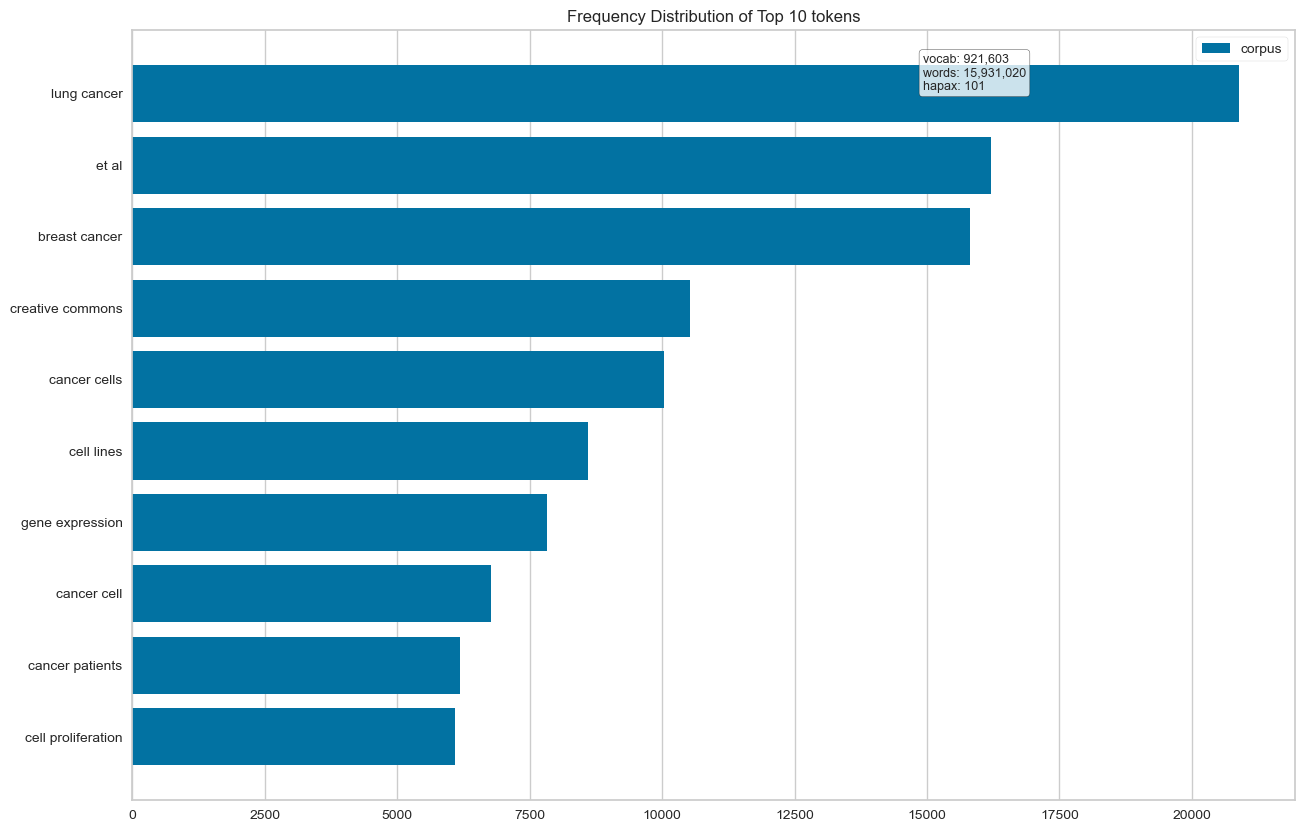

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [36]:
fig = plt.figure(figsize=(15,10))
vectorizer = CountVectorizer(ngram_range=(2, 2))
docs       = vectorizer.fit_transform(df['text_sw'].tolist())
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h', n=10)
visualizer.fit(docs)
visualizer.show()

# 4. Predictive model

## Creating train and test dataset (80% = train and 20% = test)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(df[['text_sw']], df['label'], test_size=0.30, random_state=42, stratify=df['label'])

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("-"*20)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (5299, 1)
y_train shape: (5299,)
--------------------
X_test shape: (2271, 1)
y_test shape: (2271,)


## TF-IDF

![](https://miro.medium.com/max/1200/1*V9ac4hLVyms79jl65Ym_Bw.jpeg)

ref.: https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/

In [192]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['text_sw'])
X_test_vec = vectorizer.transform(X_test['text_sw'])

print(f"X_train_vec shape: {X_train_vec.shape}")
print(f"y_train shape: {y_train.shape}")
print("-"*20)
print(f"X_test_vec shape: {X_test_vec.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_vec shape: (5299, 159276)
y_train shape: (5299,)
--------------------
X_test_vec shape: (2271, 159276)
y_test shape: (2271,)


### Some tf-idf examples...

In [193]:
# Transform into dataframe
X_train_vec_df = pd.DataFrame(columns=vectorizer.get_feature_names(), data=X_train_vec.toarray())
X_test_vec_df = pd.DataFrame(columns=vectorizer.get_feature_names(), data=X_test_vec.toarray())

# some sample
#X_train_vec_df[(X_train_vec_df['patient']>0) | (X_train_vec_df['lung'] > 0) | (X_train_vec_df['cancer'] > 0) | (X_train_vec_df['thyroid'] > 0) ][['patient', 'lung', 'cancer', 'thyroid']].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Function for Plotting Confusion Matrix and Calculating accuracy, precision, recall

In [194]:
from sklearn.metrics import plot_confusion_matrix
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [195]:
def score_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted,average= 'macro')
    recall = recall_score(y_test, y_predicted,average='macro')
    print("accuracy = %0.6f, precision = %0.6f, recall = %0.6f" % (accuracy, precision, recall))

## Multinomial Naive Bayes

In [219]:
MNB_clf = MultinomialNB().fit(X_train_vec_df, y_train)
y_pred_MNB_clf = clf.predict(X_test_vec_df)

In [220]:
score_metrics(y_test, y_pred_MNB_clf)

accuracy = 0.925143, precision = 0.930836, recall = 0.928201


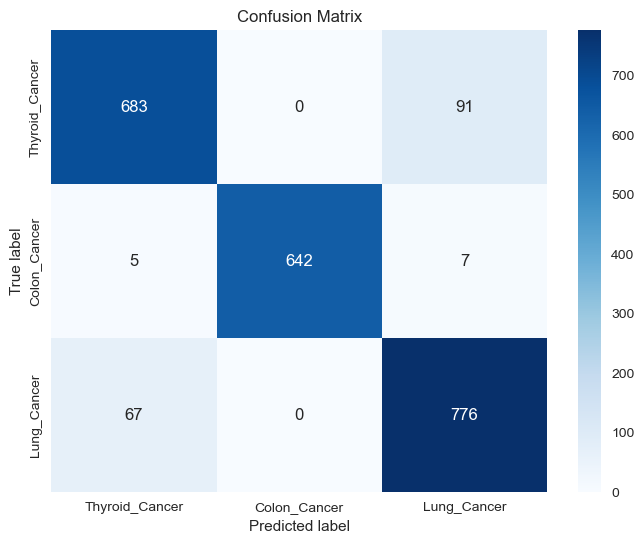

In [221]:
plot_confusion_matrix(y_test, y_pred_MNB_clf)

In [222]:
print(classification_report(y_test, y_pred_MNB_clf))

                precision    recall  f1-score   support

  Colon_Cancer       0.90      0.88      0.89       774
   Lung_Cancer       1.00      0.98      0.99       654
Thyroid_Cancer       0.89      0.92      0.90       843

      accuracy                           0.93      2271
     macro avg       0.93      0.93      0.93      2271
  weighted avg       0.93      0.93      0.93      2271



## Gaussian Naive Bayes

In [249]:
LR_clf = LogisticRegression(random_state=42,solver = 'liblinear').fit(X_train_vec_df, y_train)
y_pred_LR_clf = LR_clf.predict(X_test_vec_df)

In [250]:
score_metrics(y_test, y_pred_LR_clf)

accuracy = 0.936592, precision = 0.940447, recall = 0.940734


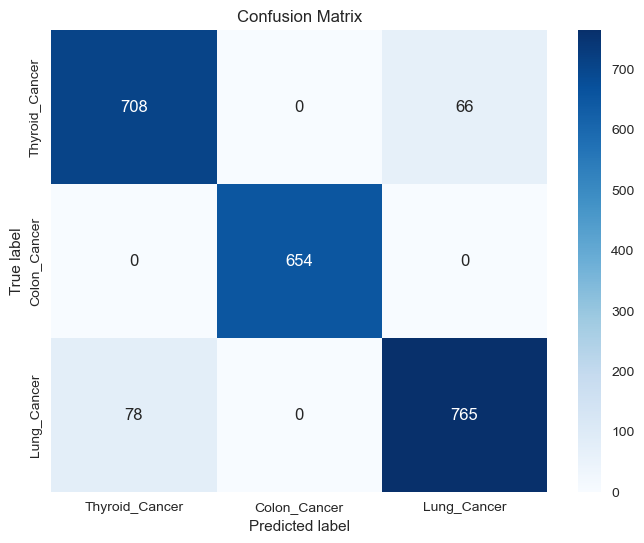

In [251]:
plot_confusion_matrix(y_test, y_pred_LR_clf)

In [252]:
print(classification_report(y_test, y_pred_LR_clf))

                precision    recall  f1-score   support

  Colon_Cancer       0.90      0.91      0.91       774
   Lung_Cancer       1.00      1.00      1.00       654
Thyroid_Cancer       0.92      0.91      0.91       843

      accuracy                           0.94      2271
     macro avg       0.94      0.94      0.94      2271
  weighted avg       0.94      0.94      0.94      2271



## Bernoulli Naive Bayes

In [231]:
BB_clf = BernoulliNB().fit(X_train_vec_df, y_train)
y_pred_BB_clf = BB_clf.predict(X_test_vec_df)

In [232]:
score_metrics(y_test, y_pred_BB_clf)

accuracy = 0.922941, precision = 0.924436, recall = 0.928088


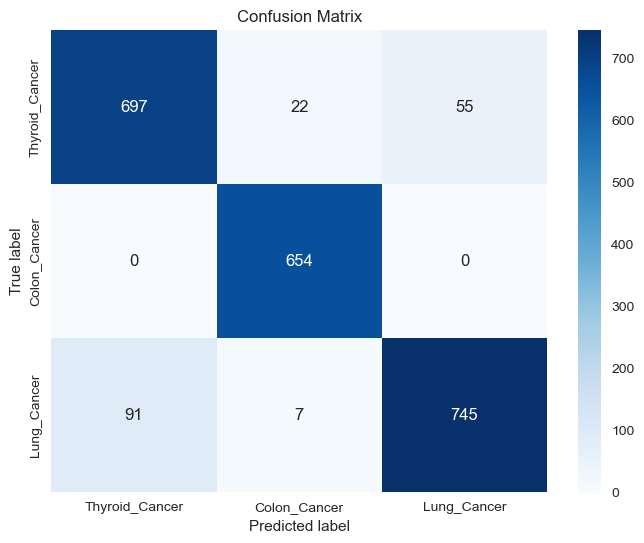

In [233]:
plot_confusion_matrix(y_test, y_pred_BB_clf)

In [234]:
print(classification_report(y_test, y_pred_BB_clf))

                precision    recall  f1-score   support

  Colon_Cancer       0.88      0.90      0.89       774
   Lung_Cancer       0.96      1.00      0.98       654
Thyroid_Cancer       0.93      0.88      0.91       843

      accuracy                           0.92      2271
     macro avg       0.92      0.93      0.93      2271
  weighted avg       0.92      0.92      0.92      2271



## LSTM - Deep Learning Model

In [235]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [142]:
max_words = 5000
max_len = 300

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['text'][0],'\n')

Before Tokenization & Padding 
 Thyroid surgery in  children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the  aDepartment of Surgery College of Medicine Qassim University Buraidah Al Qassim Saudi Arabia  bDepartment of Surgery King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia cDepartment of Medicine King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia Correspondence   Dr  Osama Ibrahim  Almosallam  Department of  Surgery  College  of  Medicine Qassim  University  PO  Box   Buraidah  Al  Qassim   Saudi  Arabia  osama_iaahotmailcom ORCID orcid0000000290367564        Citation  Almosallam OI Aseeri A Alhumaid A AlZahrani AS Alsobhi S AlShanafey S Thyroid surgery in  children  in  a  single  institution  from   Ann  Saudi  Med         Received January  Accepted May  Published August  Copyright Copyright   Annals of Saudi Medicine Saudi Arabia This is an   acces

In [143]:
X, tokenizer = tokenize_pad_sequences(df['text'])
print('After Tokenization & Padding \n', X[0])

After Tokenization & Padding 
 [  77   66  127 2090 1463  207  147    4  225  175   82  187   39    8
   58  569   83  308   15   80    6    6   73   69    6  207  147    4
 1611    3 4943 1667   41   41   69   31  128   69   31   66  127  207
  147  179    4 1611    3 4943   23  165 1145  179    2 2090  207  363
  468  718  147  638   41 2363  445   67 1546 1435 4429   66  127 2090
  207   15   41  958  598  128   69  175   80   69  612   66  127  371
  595    2  207  147    4 1611    3 4943  165    2 1145    2    6  450
 4860    4   41  991  130   77   77  318  764    3  371  595    2    4
 1569  207   15  821   41  958 3118 3732   67  932   34  274 1450    8
 1532  548  363  468  190   38    6 1463  207   15   82  139  713 3446
   23   80 2638 1652 2145 3424 1409 3152   66  127 1569  207  147    4
 1611    3 1370 1202  945    2   17  183   27   76 4860  150  168 3199
  179   31  176    6   69    6   69 1569  147    2    1  207 1878    2
 4793    3 1203 1721    3  273    6 3412   29 

In [145]:
y = pd.get_dummies(df.label)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (4239, 300) (4239, 3)
Validation Set: (1817, 300) (1817, 3)
Test Set:       (1514, 300) (1514, 3)


In [154]:
vocab_size = 5000
embedding_size = 32
epochs=20

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='sigmoid'))

plot_model(model, show_shapes = True)  

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [155]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 32)           160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 300, 32)           3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 150, 32)          0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                

In [156]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/20
67/67 [==============================] - 8s 66ms/step - loss: 0.9875 - accuracy: 0.4468 - val_loss: 0.5781 - val_accuracy: 0.7083
Epoch 2/20
67/67 [==============================] - 4s 64ms/step - loss: 0.4597 - accuracy: 0.7731 - val_loss: 0.2651 - val_accuracy: 0.8949
Epoch 3/20
67/67 [==============================] - 5s 76ms/step - loss: 0.1571 - accuracy: 0.9561 - val_loss: 0.1654 - val_accuracy: 0.9807
Epoch 4/20
67/67 [==============================] - 5s 78ms/step - loss: 0.1035 - accuracy: 0.9736 - val_loss: 0.4053 - val_accuracy: 0.9037
Epoch 5/20
67/67 [==============================] - 5s 75ms/step - loss: 0.5568 - accuracy: 0.8061 - val_loss: 0.1698 - val_accuracy: 0.9587
Epoch 6/20
67/67 [==============================] - 5s 74ms/step - loss: 0.1204 - accuracy: 0.9757 - val_loss: 0.0611 - val_accuracy: 0.9840
Epoch 7/20
67/67 [==============================] - 5s 78ms/step - loss: 0.0494 - accuracy: 0.9899 - val_loss: 0.0354 - val_accuracy: 0.9890
Epoch 8/20
67

In [216]:
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.9888


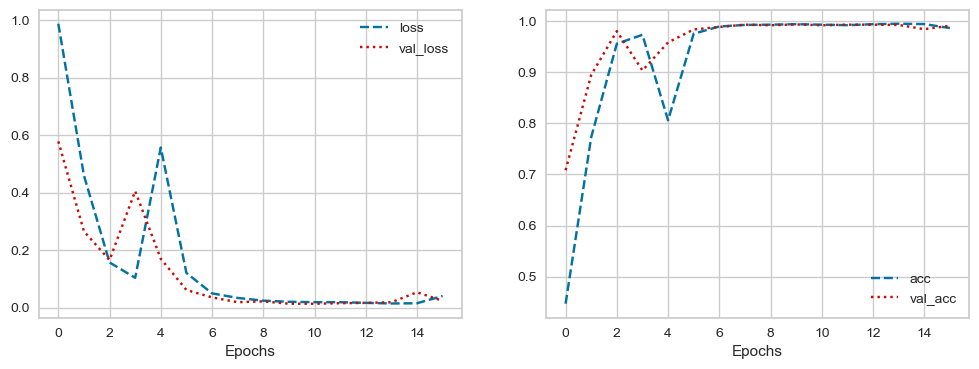

In [158]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

48/48 [==============================] - 1s 10ms/step


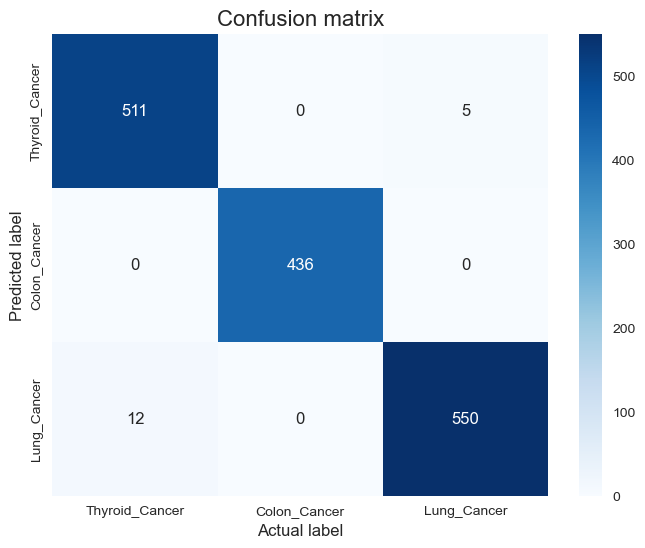

In [160]:
def plot_confusion_matrix(model, X_test, y_test):
        y_pred = model.predict(X_test)

    classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_tst, y_tst)